# Example notebook for the ATOM pipeline
---------------------------------

Download the Australian weather dataset from kaggle at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.  
  
**Description:** Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow.

In [1]:
# Import packages
import pandas as pd
from atom import ATOM

# Load the Australian weather dataset
X = pd.read_csv('weatherAUS.csv')
X = X.drop('RISK_MM', axis=1)  # Drop feature directly related to RainTomorrow

Using TensorFlow backend.


In [2]:
# Call ATOM using only a percentage of the complete dataset (for explanatory purposes)
atom = ATOM(X, target="RainTomorrow", percentage=10, verbose=3)

<<=============== ATOM ===============>>
Algorithm task: binary classification.

Data stats =====================>
Number of features: 22
Number of instances: 14219
Size of training set: 9953
Size of test set: 4266
Instances per target class:
RainTomorrow --> Count
0: No        --> 10973
1: Yes       --> 3246



In [3]:
# Impute missing values
atom.impute(strat_num='mean', strat_cat='remove', max_frac=0.8)

Handling missing values...
 --> Imputing 56 values with mean in feature MinTemp.
 --> Imputing 17 values with mean in feature MaxTemp.
 --> Imputing 105 values with mean in feature Rainfall.
 --> Imputing 4310 values with mean in feature Evaporation.
 --> Imputing 4774 values with mean in feature Sunshine.
 --> Removing 643 rows due to missing values in feature WindGustDir.
 --> Removing 535 rows due to missing values in feature WindDir9am.
 --> Removing 57 rows due to missing values in feature WindDir3pm.
 --> Imputing 85 values with mean in feature Humidity9am.
 --> Imputing 108 values with mean in feature Humidity3pm.
 --> Imputing 635 values with mean in feature Pressure9am.
 --> Imputing 631 values with mean in feature Pressure3pm.
 --> Imputing 3307 values with mean in feature Cloud9am.
 --> Imputing 3463 values with mean in feature Cloud3pm.
 --> Imputing 30 values with mean in feature Temp9am.
 --> Imputing 49 values with mean in feature Temp3pm.
 --> Removing 68 rows due to mi

In [4]:
# Encode the categroical features
atom.encode(max_onehot=10)

Encoding categorical features...
 --> Label-encoding feature Date. Contains 3101 unique categories.
 --> Label-encoding feature Location. Contains 47 unique categories.
 --> Label-encoding feature WindGustDir. Contains 16 unique categories.
 --> Label-encoding feature WindDir9am. Contains 16 unique categories.
 --> Label-encoding feature WindDir3pm. Contains 16 unique categories.
 --> Label-encoding feature RainToday. Contains 2 unique categories.


In [5]:
# Select only the best 10 features
atom.feature_selection(strategy="univariate", max_features=10, max_correlation=0.8)

# See which features were removed due to collinearity
atom.collinear

Performing feature selection...
 --> Feature Pressure3pm was removed due to collinearity with another feature.
 --> Feature Temp9am was removed due to collinearity with another feature.
 --> Feature Temp3pm was removed due to collinearity with another feature.
 --> Feature Date was removed after the univariate test (score: 0.16  p-value: 0.69).
 --> Feature Location was removed after the univariate test (score: 0.04  p-value: 0.85).
 --> Feature MinTemp was removed after the univariate test (score: 67.75  p-value: 0.00).
 --> Feature MaxTemp was removed after the univariate test (score: 356.37  p-value: 0.00).
 --> Feature Evaporation was removed after the univariate test (score: 148.84  p-value: 0.00).
 --> Feature WindGustDir was removed after the univariate test (score: 43.68  p-value: 0.00).
 --> Feature WindDir9am was removed after the univariate test (score: 10.15  p-value: 0.00).
 --> Feature WindDir3pm was removed after the univariate test (score: 8.79  p-value: 0.00).
 --> Fea

,drop_feature,corr_feature,corr_value
0,[Pressure3pm],[Pressure9am],[0.9581391046825052]
1,"[Temp9am, Temp9am]","[MinTemp, MaxTemp]","[0.8965023857540605, 0.8851121768364909]"
2,"[Temp3pm, Temp3pm]","[MaxTemp, Temp9am]","[0.975379064115311, 0.8553507603048623]"


In [6]:
# Perform undersampling of the majority class to balance the dataset a bit
atom.balance(undersample=0.8)

Performing undersampling...
 --> Removing 4261 rows from majority class.


In [7]:
# Remove outliers from the training set
atom.outliers(max_sigma=5)

Handling outliers...
 --> Dropping 34 rows due to outliers.


In [8]:
# Change the verbosity of ATOM to not print too much details while fitting
atom.verbose = 1

# Fit using successive halving on tree-based models
atom.fit(['tree', 'bag', 'et', 'rf', 'adaboost', 'lgbm'],
        successive_halving=True,
        metric='f1',
        max_iter=5,
        init_points=1,
        cv=1,
        bagging=5)


Running pipeline =================>


<<================ Iteration 0 ================>>
Models in pipeline: ['Tree', 'Bag', 'ET', 'RF', 'AdaBoost', 'LGBM']


100%|████████████████████████████████████████████| 6/6 [00:30<00:00,  5.14s/it]




Final stats ================>>
Duration: 00h:00m:30s
Target metric: F1
--------------------------------
Decision Tree     --> 0.603 ± 0.036
Bagging           --> 0.638 ± 0.019 !!
Extra-Trees       --> 0.629 ± 0.017
Random Forest     --> 0.611 ± 0.029
Adaptive Boosting --> 0.617 ± 0.007
Light GBM         --> 0.622 ± 0.018


<<================ Iteration 1 ================>>
Models in pipeline: ['Bag', 'ET', 'LGBM']


100%|████████████████████████████████████████████| 3/3 [00:23<00:00,  7.78s/it]




Final stats ================>>
Duration: 00h:00m:54s
Target metric: F1
--------------------------------
Bagging     --> 0.661 ± 0.014
Extra-Trees --> 0.655 ± 0.009
Light GBM   --> 0.677 ± 0.010 !!


<<================ Iteration 2 ================>>
Models in pipeline: ['LGBM']


100%|████████████████████████████████████████████| 1/1 [00:05<00:00,  5.17s/it]




Final stats ================>>
Duration: 00h:00m:59s
Target metric: F1
--------------------------------
Light GBM --> 0.684 ± 0.002


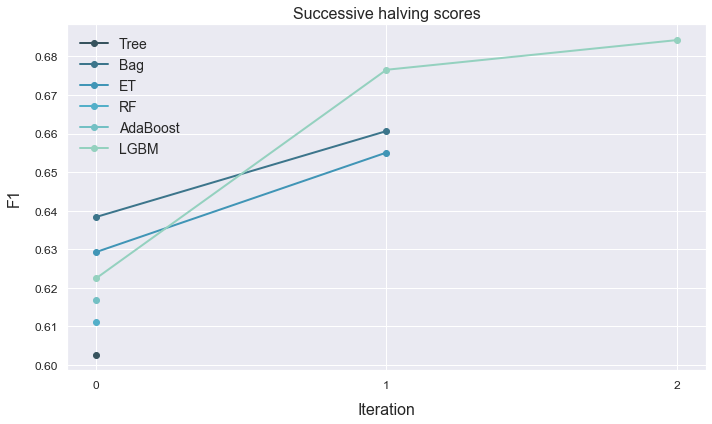

In [9]:
atom.plot_successive_halving()

In [10]:
# Check scores of the first iteration
atom.results[0]

,model,score,bagging_mean,bagging_std
0,Tree,0.647541,0.602704,0.035857
1,Bag,0.655319,0.638389,0.019400
2,ET,0.646809,0.629300,0.016547
3,RF,0.595918,0.611185,0.028883
4,AdaBoost,0.644898,0.616738,0.006960
5,LGBM,0.661224,0.622494,0.018362


### Light GBM proved to be the best. Let's have a look at the model!

In [13]:
# Check the winner out
print('Best score: ', atom.lgbm.score)
atom.lgbm.best_model

Best score:  0.6936936936936938


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               learning_rate=0.01, max_depth=10, min_child_samples=10,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
               n_jobs=-1, num_leaves=20, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=1)

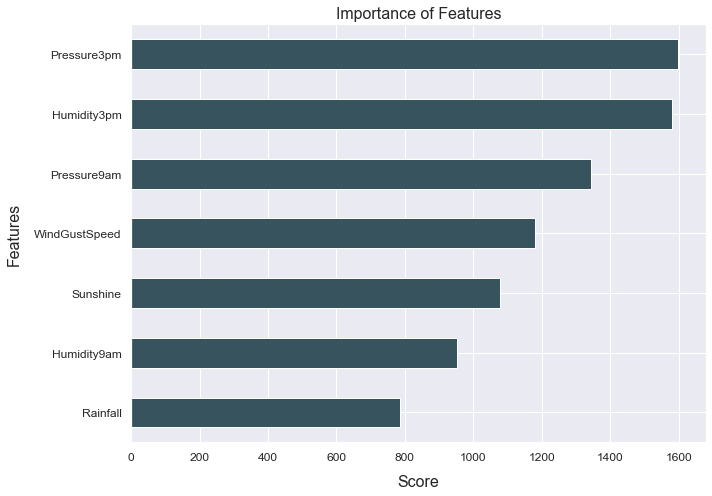

In [14]:
# See feature importance
atom.lgbm.plot_feature_importance(show=7, figsize=(10,7))